In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Dataset_Final.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   final_tweet  4718 non-null   object
 1   sentiment    4718 non-null   object
dtypes: object(2)
memory usage: 73.8+ KB


In [4]:
df.head()

,final_tweet,sentiment
0,chatib basri kartu prakerja indikator orang pu...,negatif
1,kartu prakerja,netral
2,bbm roket tarif listrik roket garuda rugi krak...,netral
3,untung bukan insentif prakerja,netral
4,tuhan terimakasih rezeki insentif prakerja tah...,positif


In [5]:
text = df.final_tweet
sentiment = df.sentiment

# SPLIT DATA 7:3

## Model NBC

In [6]:
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

In [7]:
#TFIDF
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=(1,1),
                        norm='l2',
                        sublinear_tf=True)

In [8]:
tf_idf = tfidf.fit_transform(text).toarray()

In [9]:
df_tfidf = pd.DataFrame(tf_idf, 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(text))],
             columns=tfidf.get_feature_names())

In [10]:
df_tfidf.transpose().sample(10)

,sentence 1,sentence 2,sentence 3,sentence 4,sentence 5,sentence 6,sentence 7,sentence 8,sentence 9,sentence 10,...,sentence 4709,sentence 4710,sentence 4711,sentence 4712,sentence 4713,sentence 4714,sentence 4715,sentence 4716,sentence 4717,sentence 4718
gaksih,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
dite,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
rugi,0.0,0.0,0.329739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
impact,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
the,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.38493,0.0,0.0,0.0
mengurus,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
benefit,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
doyan,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
konspirasiri,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
jajan,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


In [11]:
nbc = MultinomialNB()

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(tf_idf,
                                                    sentiment, 
                                                    test_size = 0.3,
                                                    random_state = 123)

In [13]:
nbc.fit(X_train,Y_train)
predict_nbc = nbc.predict(X_test)

In [14]:
training_accuracy = accuracy_score(Y_train, nbc.predict(X_train))
print('Training Acc : ',training_accuracy)

Training Acc :  0.8419139915202908


In [15]:
test_accuracy = accuracy_score(Y_test, predict_nbc)
print('Test Acc : ',test_accuracy)

Test Acc :  0.7620056497175142


In [16]:
print(classification_report(Y_test, predict_nbc))

              precision    recall  f1-score   support

     negatif       0.88      0.66      0.75       300
      netral       0.77      0.65      0.71       489
     positif       0.72      0.90      0.80       627

    accuracy                           0.76      1416
   macro avg       0.79      0.74      0.75      1416
weighted avg       0.77      0.76      0.76      1416



In [17]:
from collections import Counter
print('Prediksi Test :', Counter(predict_nbc))
print('True Value : ',Counter(Y_test))

Prediksi Test : Counter({'positif': 780, 'netral': 411, 'negatif': 225})
True Value :  Counter({'positif': 627, 'netral': 489, 'negatif': 300})


In [18]:
conf_matrix = confusion_matrix(Y_test, predict_nbc)
print(conf_matrix)

[[197  36  67]
 [ 22 318 149]
 [  6  57 564]]


<AxesSubplot:>

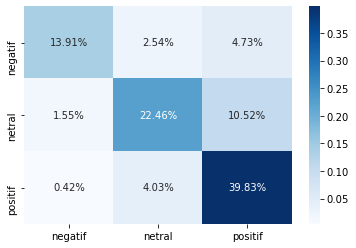

In [19]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

## CNN

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
def convert_predict_cnn(predict):
    x = []
    for i in predict :
        if i == 0 :
            x.append('negatif')
        elif i == 1 :
            x.append('netral')
        else :
            x.append('positif')
    return x

def preprocessing_cnn(X_train,X_test,Test=False):
    tokenizer = Tokenizer(num_words=5000, oov_token='-')   
    tokenizer.fit_on_texts(X_test)
    tokenizer.fit_on_texts(X_train)
    
    sekuens_test = tokenizer.texts_to_sequences(X_test)
    padded_test = pad_sequences(sekuens_test)
    
    if Test == False :
        sekuens_train = tokenizer.texts_to_sequences(X_train)
        padded_train = pad_sequences(sekuens_train) 
        return padded_train, padded_test
        
    else :
        return padded_test

In [22]:
target = pd.get_dummies(df['sentiment'])

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(text,
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state = 123)

In [24]:
padded_train, padded_test = preprocessing_cnn(X_train,X_test)
print('Train : ',len(padded_train))
print('Test : ',len(padded_test))

Train :  3302
Test :  1416


In [25]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=6,monitor='val_loss')

### Model 1 (CNN - Bidirectional LSTM)

In [26]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         262272    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 1,585,667
Trainable params: 1,585,667
Non-trainable params: 0
______________________________________________

In [27]:
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(lr=0.0039810715),
              metrics=['accuracy'])
# fit
history = model_1.fit(padded_train, Y_train, epochs=20, verbose=2,callbacks=[early_stop], validation_data=(padded_test, Y_test))

Train on 3302 samples, validate on 1416 samples
Epoch 1/20
3302/3302 - 26s - loss: 0.7112 - accuracy: 0.6693 - val_loss: 0.5454 - val_accuracy: 0.7535
Epoch 2/20
3302/3302 - 21s - loss: 0.4487 - accuracy: 0.8298 - val_loss: 0.5493 - val_accuracy: 0.7705
Epoch 3/20
3302/3302 - 19s - loss: 0.2760 - accuracy: 0.9085 - val_loss: 0.6994 - val_accuracy: 0.7782
Epoch 4/20
3302/3302 - 19s - loss: 0.1901 - accuracy: 0.9364 - val_loss: 0.7449 - val_accuracy: 0.7790
Epoch 5/20
3302/3302 - 16s - loss: 0.1610 - accuracy: 0.9509 - val_loss: 0.8435 - val_accuracy: 0.7726
Epoch 6/20
3302/3302 - 19s - loss: 0.1325 - accuracy: 0.9600 - val_loss: 1.0486 - val_accuracy: 0.7811
Epoch 7/20
3302/3302 - 16s - loss: 0.1160 - accuracy: 0.9649 - val_loss: 1.2158 - val_accuracy: 0.7747


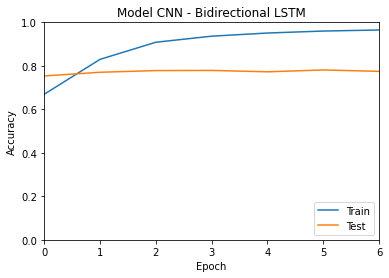

In [28]:
epoch = len(history.history['accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis([0,epoch-1,0,1])
plt.title('Model CNN - Bidirectional LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='lower right')
plt.show()

In [29]:
predict = model_1.predict(padded_test)
predict_train = model_1.predict(padded_train)

In [30]:
y_test = convert_predict_cnn(np.argmax(np.array(Y_test), axis=1))
y_train = convert_predict_cnn(np.argmax(np.array(Y_train), axis=1))
predict = convert_predict_cnn(np.argmax(predict, axis=1))
predict_train = convert_predict_cnn(np.argmax(predict_train, axis=1))

In [31]:
train_accuracy = accuracy_score(y_train, predict_train)
print("Akurasi Train = ",train_accuracy)

test_accuracy = accuracy_score(y_test, predict)
print("Akurasi Test = ",test_accuracy)

Akurasi Train =  0.9718352513628105
Akurasi Test =  0.7747175141242938


In [32]:
print('Prediksi Test :', Counter(predict))
print('True Value : ',Counter(y_test))

Prediksi Test : Counter({'positif': 604, 'netral': 520, 'negatif': 292})
True Value :  Counter({'positif': 627, 'netral': 489, 'negatif': 300})


In [33]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

     negatif       0.77      0.75      0.76       300
      netral       0.72      0.76      0.74       489
     positif       0.83      0.80      0.81       627

    accuracy                           0.77      1416
   macro avg       0.77      0.77      0.77      1416
weighted avg       0.78      0.77      0.78      1416



In [34]:
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

[[224  46  30]
 [ 44 372  73]
 [ 24 102 501]]


<AxesSubplot:>

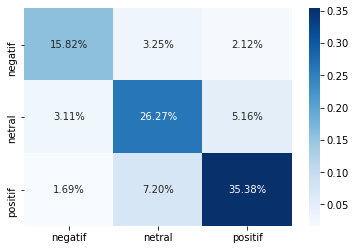

In [35]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

### Model 2 (CNN GlobalMaxPool)

In [36]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         262272    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 1,546,499
Trainable params: 1,546,499
Non-trainable params: 0
____________________________________________

In [37]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(lr=0.0018478498),
              metrics=['accuracy'])
# fit
history = model_2.fit(padded_train, Y_train, epochs=20, verbose=2,callbacks=[early_stop], validation_data=(padded_test, Y_test))

Train on 3302 samples, validate on 1416 samples
Epoch 1/20
3302/3302 - 16s - loss: 0.7475 - accuracy: 0.6575 - val_loss: 0.5272 - val_accuracy: 0.7712
Epoch 2/20
3302/3302 - 14s - loss: 0.4512 - accuracy: 0.8310 - val_loss: 0.4808 - val_accuracy: 0.7818
Epoch 3/20
3302/3302 - 15s - loss: 0.2766 - accuracy: 0.9140 - val_loss: 0.5441 - val_accuracy: 0.7867
Epoch 4/20
3302/3302 - 15s - loss: 0.1955 - accuracy: 0.9388 - val_loss: 0.6411 - val_accuracy: 0.7797
Epoch 5/20
3302/3302 - 14s - loss: 0.1722 - accuracy: 0.9573 - val_loss: 0.6438 - val_accuracy: 0.7910
Epoch 6/20
3302/3302 - 15s - loss: 0.1282 - accuracy: 0.9615 - val_loss: 0.7198 - val_accuracy: 0.7874
Epoch 7/20
3302/3302 - 15s - loss: 0.1278 - accuracy: 0.9612 - val_loss: 0.7514 - val_accuracy: 0.7578
Epoch 8/20
3302/3302 - 15s - loss: 0.1157 - accuracy: 0.9658 - val_loss: 0.9152 - val_accuracy: 0.7839


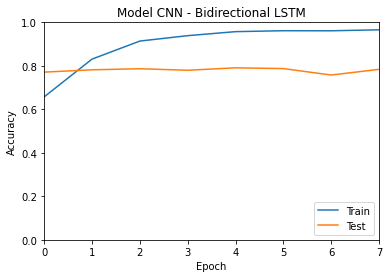

In [38]:
epoch = len(history.history['accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis([0,epoch-1,0,1])
plt.title('Model CNN - Bidirectional LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='lower right')
plt.show()

In [39]:
predict = model_2.predict(padded_test)
predict_train = model_2.predict(padded_train)

In [40]:
y_test = convert_predict_cnn(np.argmax(np.array(Y_test), axis=1))
y_train = convert_predict_cnn(np.argmax(np.array(Y_train), axis=1))
predict = convert_predict_cnn(np.argmax(predict, axis=1))
predict_train = convert_predict_cnn(np.argmax(predict_train, axis=1))

In [41]:
train_accuracy = accuracy_score(y_train, predict_train)
print("Akurasi Train = ",train_accuracy)

test_accuracy = accuracy_score(y_test, predict)
print("Akurasi Test = ",test_accuracy)

Akurasi Train =  0.9769836462749849
Akurasi Test =  0.7838983050847458


In [42]:
print('Prediksi Test :', Counter(predict))
print('True Value : ',Counter(y_test))

Prediksi Test : Counter({'positif': 577, 'netral': 561, 'negatif': 278})
True Value :  Counter({'positif': 627, 'netral': 489, 'negatif': 300})


In [43]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

     negatif       0.79      0.74      0.76       300
      netral       0.70      0.81      0.75       489
     positif       0.86      0.79      0.82       627

    accuracy                           0.78      1416
   macro avg       0.79      0.78      0.78      1416
weighted avg       0.79      0.78      0.79      1416



In [44]:
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

[[221  56  23]
 [ 34 395  60]
 [ 23 110 494]]


<AxesSubplot:>

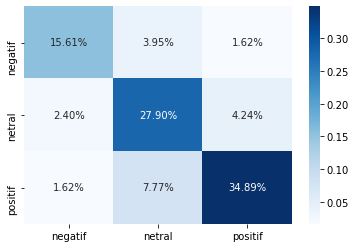

In [45]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

### Model 3 (CNN - LSTM)

In [46]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 256)         1280000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         262272    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 1,564,035
Trainable params: 1,564,035
Non-trainable params: 0
____________________________________________

In [47]:
model_3.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(lr=0.0018478498),
              metrics=['accuracy'])
# fit
history = model_3.fit(padded_train, Y_train, epochs=20, verbose=2,callbacks=[early_stop], validation_data=(padded_test, Y_test))

Train on 3302 samples, validate on 1416 samples
Epoch 1/20
3302/3302 - 20s - loss: 0.7223 - accuracy: 0.6778 - val_loss: 0.5306 - val_accuracy: 0.7761
Epoch 2/20
3302/3302 - 16s - loss: 0.4055 - accuracy: 0.8471 - val_loss: 0.5121 - val_accuracy: 0.7782
Epoch 3/20
3302/3302 - 16s - loss: 0.2418 - accuracy: 0.9204 - val_loss: 0.6202 - val_accuracy: 0.7846
Epoch 4/20
3302/3302 - 16s - loss: 0.1728 - accuracy: 0.9409 - val_loss: 0.7069 - val_accuracy: 0.7910
Epoch 5/20
3302/3302 - 16s - loss: 0.1424 - accuracy: 0.9564 - val_loss: 0.8578 - val_accuracy: 0.7867
Epoch 6/20
3302/3302 - 16s - loss: 0.1136 - accuracy: 0.9640 - val_loss: 0.9469 - val_accuracy: 0.7775
Epoch 7/20
3302/3302 - 16s - loss: 0.0902 - accuracy: 0.9721 - val_loss: 1.1148 - val_accuracy: 0.7839
Epoch 8/20
3302/3302 - 16s - loss: 0.0815 - accuracy: 0.9718 - val_loss: 1.2513 - val_accuracy: 0.7733


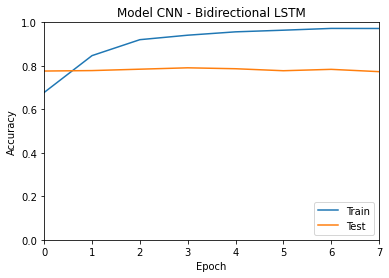

In [48]:
epoch = len(history.history['accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis([0,epoch-1,0,1])
plt.title('Model CNN - Bidirectional LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='lower right')
plt.show()

In [49]:
predict = model_3.predict(padded_test)
predict_train = model_3.predict(padded_train)

In [50]:
y_test = convert_predict_cnn(np.argmax(np.array(Y_test), axis=1))
y_train = convert_predict_cnn(np.argmax(np.array(Y_train), axis=1))
predict = convert_predict_cnn(np.argmax(predict, axis=1))
predict_train = convert_predict_cnn(np.argmax(predict_train, axis=1))

In [51]:
train_accuracy = accuracy_score(y_train, predict_train)
print("Akurasi Train = ",train_accuracy)

test_accuracy = accuracy_score(y_test, predict)
print("Akurasi Test = ",test_accuracy)

Akurasi Train =  0.9781950333131435
Akurasi Test =  0.7733050847457628


In [52]:
print('Prediksi Test :', Counter(predict))
print('True Value : ',Counter(y_test))

Prediksi Test : Counter({'netral': 577, 'positif': 545, 'negatif': 294})
True Value :  Counter({'positif': 627, 'netral': 489, 'negatif': 300})


In [53]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

     negatif       0.77      0.75      0.76       300
      netral       0.69      0.81      0.74       489
     positif       0.87      0.75      0.81       627

    accuracy                           0.77      1416
   macro avg       0.77      0.77      0.77      1416
weighted avg       0.78      0.77      0.78      1416



In [54]:
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

[[226  51  23]
 [ 44 396  49]
 [ 24 130 473]]


<AxesSubplot:>

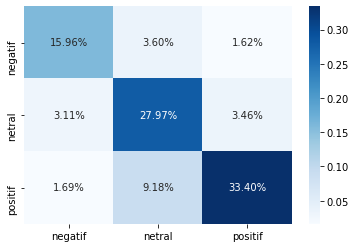

In [55]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

# KFold k=5

In [56]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

## NBC

In [57]:
#NBC
model_nbc = MultinomialNB()
train_scores = []
test_scores = []
predict_value = []
report = []
index = []

for train_index, test_index in skf.split(tf_idf, sentiment):
    index.append([train_index, test_index])
    X_train = tf_idf[train_index]
    X_test = tf_idf[test_index]
    y_train = sentiment[train_index]
    y_test = sentiment[test_index]

    #Train the model
    model_nbc.fit(X_train, y_train)
    
    train_yhat = model_nbc.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    # evaluate on the test dataset
    test_yhat = model_nbc.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    report.append(classification_report(y_test, test_yhat))
    predict_value.append(test_yhat)
    

In [58]:
df_score = pd.DataFrame(data = {'Akurasi Train': train_scores, 
                                'Akurasi Test': test_scores}, 
             index=['K'+str(i) for i in range(1, 1+len(train_scores))])

In [59]:
df_score

,Akurasi Train,Akurasi Test
K1,0.844197,0.770127
K2,0.845522,0.751059
K3,0.843667,0.751059
K4,0.842649,0.777306
K5,0.847682,0.716861


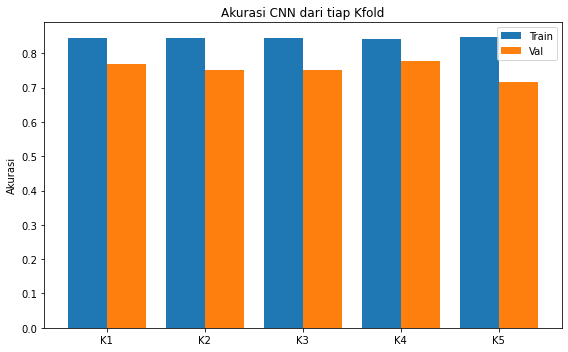

In [60]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(5)  # the label locations
width = 0.4  # the width of the bars
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Val')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Akurasi')
ax.set_title('Akurasi CNN dari tiap Kfold')
ax.set_xticks(x)
ax.set_xticklabels(['K1','K2','K3','K4','K5'])
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [61]:
n = test_scores.index(max(test_scores))

y_test = sentiment[index[n][1]]

In [62]:
print('Best Train Acc : ',train_scores[n])
print('Best Test Acc : ',test_scores[n])

Best Train Acc :  0.8426490066225165
Best Test Acc :  0.777306468716861


In [63]:
print(report[n])

              precision    recall  f1-score   support

     negatif       0.85      0.66      0.74       192
      netral       0.81      0.69      0.74       344
     positif       0.74      0.91      0.81       407

    accuracy                           0.78       943
   macro avg       0.80      0.75      0.77       943
weighted avg       0.79      0.78      0.77       943



In [64]:
conf_matrix = confusion_matrix(y_test, predict_value[n])
print(conf_matrix)

[[126  24  42]
 [ 18 237  89]
 [  5  32 370]]


<AxesSubplot:>

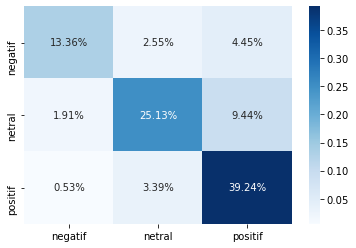

In [65]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

## CNN - Bidirectional LSTM

In [66]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 256)         1280000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 128)         262272    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 1,585,667
Trainable params: 1,585,667
Non-trainable params: 0
____________________________________________

In [116]:
train_scores = []
test_scores = []
predict_value = []
report = []
index = []
final_tweet = df['final_tweet'].to_numpy()
sentiment = df['sentiment'].to_numpy()
for train_index, test_index in skf.split(final_tweet, sentiment):
    index.append([train_index, test_index])
    X_train = final_tweet[train_index]
    X_test = final_tweet[test_index]
    y_train = pd.get_dummies(sentiment[train_index])
    y_test = pd.get_dummies(sentiment[test_index])

    padded_train, padded_test = preprocessing_cnn(X_train,X_test)
    
    model_1.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.0039810715),
              metrics=['accuracy'])
    # train model
    model_1.fit(padded_train, y_train, epochs=20, verbose=0,callbacks=[early_stop], validation_data=(padded_test, y_test))
    
    #convert label
    y_test = convert_predict_cnn(np.argmax(np.array(y_test), axis=1))
    y_train = convert_predict_cnn(np.argmax(np.array(y_train), axis=1))
    
    train_yhat = convert_predict_cnn(np.argmax(model_1.predict(padded_train),axis=1))
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = convert_predict_cnn(np.argmax(model_1.predict(padded_test),axis=1))
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    report.append(classification_report(y_test, test_yhat))
    predict_value.append(test_yhat)

In [117]:
df_score = pd.DataFrame(data = {'Akurasi Train': train_scores, 
                                'Akurasi Test': test_scores}, 
             index=['K'+str(i) for i in range(1, 1+len(train_scores))])

In [118]:
df_score

,Akurasi Train,Akurasi Test
K1,0.983042,0.831568
K2,0.981452,0.818856
K3,0.978272,0.823093
K4,0.981987,0.822906
K5,0.980662,0.814422


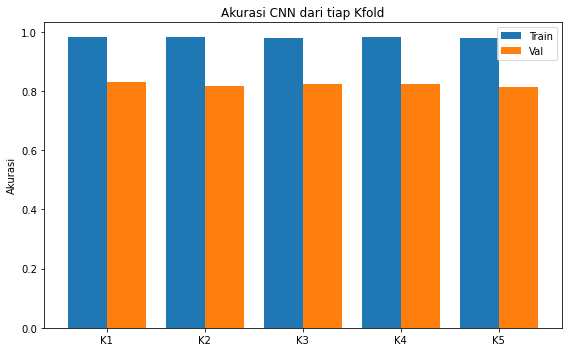

In [119]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(5)  # the label locations
width = 0.4  # the width of the bars
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Val')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Akurasi')
ax.set_title('Akurasi CNN dari tiap Kfold')
ax.set_xticks(x)
ax.set_xticklabels(['K1','K2','K3','K4','K5'])
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [120]:
n = test_scores.index(max(test_scores))

y_test = sentiment[index[n][1]]

In [121]:
print('Best Train Acc : ',train_scores[n])
print('Best Test Acc : ',test_scores[n])

Best Train Acc :  0.9830418653948065
Best Test Acc :  0.8315677966101694


In [122]:
print(report[n])

              precision    recall  f1-score   support

     negatif       0.83      0.81      0.82       192
      netral       0.83      0.79      0.81       345
     positif       0.83      0.88      0.86       407

    accuracy                           0.83       944
   macro avg       0.83      0.83      0.83       944
weighted avg       0.83      0.83      0.83       944



In [123]:
conf_matrix = confusion_matrix(y_test, predict_value[n])
print(conf_matrix)

[[156  19  17]
 [ 19 272  54]
 [ 14  36 357]]


<AxesSubplot:>

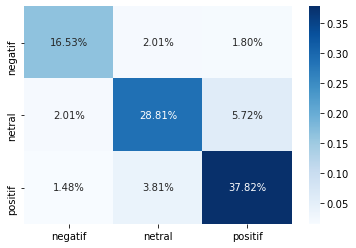

In [124]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

## CNN Global MaxPool

In [76]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 256)         1280000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 128)         262272    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 99        
Total params: 1,546,499
Trainable params: 1,546,499
Non-trainable params: 0
____________________________________________

In [97]:
train_scores = []
test_scores = []
predict_value = []
report = []
index = []
final_tweet = df['final_tweet'].to_numpy()
sentiment = df['sentiment'].to_numpy()
for train_index, test_index in skf.split(final_tweet, sentiment):
    index.append([train_index, test_index])
    X_train = final_tweet[train_index]
    X_test = final_tweet[test_index]
    y_train = pd.get_dummies(sentiment[train_index])
    y_test = pd.get_dummies(sentiment[test_index])

    padded_train, padded_test = preprocessing_cnn(X_train,X_test)
    
    model_2.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.0018478498),
              metrics=['accuracy'])
    # train model
    model_2.fit(padded_train, y_train, epochs=20, verbose=0,callbacks=[early_stop], validation_data=(padded_test, y_test))
    
    #convert label
    y_test = convert_predict_cnn(np.argmax(np.array(y_test), axis=1))
    y_train = convert_predict_cnn(np.argmax(np.array(y_train), axis=1))
    
    train_yhat = convert_predict_cnn(np.argmax(model_2.predict(padded_train),axis=1))
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = convert_predict_cnn(np.argmax(model_2.predict(padded_test),axis=1))
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    report.append(classification_report(y_test, test_yhat))
    predict_value.append(test_yhat)

In [98]:
df_score = pd.DataFrame(data = {'Akurasi Train': train_scores, 
                                'Akurasi Test': test_scores}, 
             index=['K'+str(i) for i in range(1, 1+len(train_scores))])

In [99]:
df_score

,Akurasi Train,Akurasi Test
K1,0.980392,0.868644
K2,0.980392,0.866525
K3,0.976948,0.847458
K4,0.981722,0.838812
K5,0.979338,0.853659


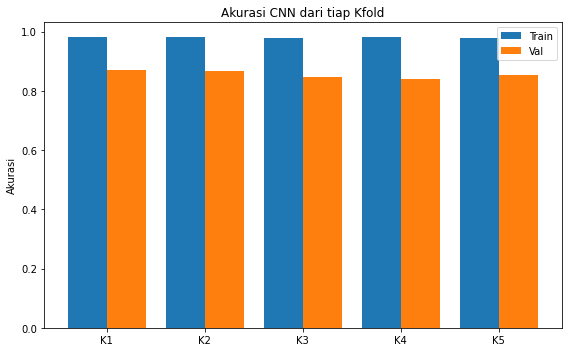

In [100]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(5)  # the label locations
width = 0.4  # the width of the bars
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Val')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Akurasi')
ax.set_title('Akurasi CNN dari tiap Kfold')
ax.set_xticks(x)
ax.set_xticklabels(['K1','K2','K3','K4','K5'])
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [101]:
n = test_scores.index(max(test_scores))

y_test = sentiment[index[n][1]]

In [102]:
print('Best Train Acc : ',train_scores[n])
print('Best Test Acc : ',test_scores[n])

Best Train Acc :  0.9803921568627451
Best Test Acc :  0.8686440677966102


In [103]:
print(report[n])

              precision    recall  f1-score   support

     negatif       0.84      0.88      0.86       192
      netral       0.88      0.82      0.85       345
     positif       0.87      0.91      0.89       407

    accuracy                           0.87       944
   macro avg       0.87      0.87      0.87       944
weighted avg       0.87      0.87      0.87       944



In [104]:
conf_matrix = confusion_matrix(y_test, predict_value[n])
print(conf_matrix)

[[169  12  11]
 [ 20 282  43]
 [ 11  27 369]]


<AxesSubplot:>

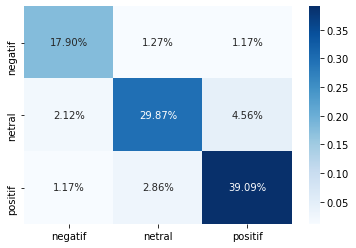

In [105]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

## CNN - LSTM

In [86]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=256),
    tf.keras.layers.Conv1D(128, activation='relu',kernel_size=8),
#     tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.LSTM(32),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 256)         1280000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 128)         262272    
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 1,564,035
Trainable params: 1,564,035
Non-trainable params: 0
____________________________________________

In [107]:
train_scores = []
test_scores = []
predict_value = []
report = []
index = []
final_tweet = df['final_tweet'].to_numpy()
sentiment = df['sentiment'].to_numpy()
for train_index, test_index in skf.split(final_tweet, sentiment):
    index.append([train_index, test_index])
    X_train = final_tweet[train_index]
    X_test = final_tweet[test_index]
    y_train = pd.get_dummies(sentiment[train_index])
    y_test = pd.get_dummies(sentiment[test_index])

    padded_train, padded_test = preprocessing_cnn(X_train,X_test)
    
    model_3.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=0.0018478498),
              metrics=['accuracy'])
    # train model
    model_3.fit(padded_train, y_train, epochs=20, verbose=0,callbacks=[early_stop], validation_data=(padded_test, y_test))
    
    #convert label
    y_test = convert_predict_cnn(np.argmax(np.array(y_test), axis=1))
    y_train = convert_predict_cnn(np.argmax(np.array(y_train), axis=1))
    
    train_yhat = convert_predict_cnn(np.argmax(model_3.predict(padded_train),axis=1))
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = convert_predict_cnn(np.argmax(model_3.predict(padded_test),axis=1))
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    report.append(classification_report(y_test, test_yhat))
    predict_value.append(test_yhat)

In [108]:
df_score = pd.DataFrame(data = {'Akurasi Train': train_scores, 
                                'Akurasi Test': test_scores}, 
             index=['K'+str(i) for i in range(1, 1+len(train_scores))])

In [109]:
df_score

,Akurasi Train,Akurasi Test
K1,0.983307,0.822034
K2,0.983572,0.850636
K3,0.980922,0.848517
K4,0.983046,0.826087
K5,0.980927,0.828208


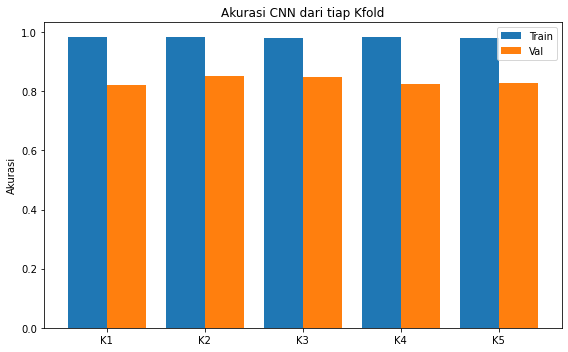

In [110]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(5)  # the label locations
width = 0.4  # the width of the bars
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Val')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Akurasi')
ax.set_title('Akurasi CNN dari tiap Kfold')
ax.set_xticks(x)
ax.set_xticklabels(['K1','K2','K3','K4','K5'])
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [111]:
n = test_scores.index(max(test_scores))

y_test = sentiment[index[n][1]]

In [112]:
print('Best Train Acc : ',train_scores[n])
print('Best Test Acc : ',test_scores[n])

Best Train Acc :  0.9835718071012188
Best Test Acc :  0.850635593220339


In [113]:
print(report[n])

              precision    recall  f1-score   support

     negatif       0.83      0.87      0.85       192
      netral       0.84      0.81      0.82       345
     positif       0.88      0.88      0.88       407

    accuracy                           0.85       944
   macro avg       0.85      0.85      0.85       944
weighted avg       0.85      0.85      0.85       944



In [114]:
conf_matrix = confusion_matrix(y_test, predict_value[n])
print(conf_matrix)

[[167  17   8]
 [ 23 279  43]
 [ 12  38 357]]


<AxesSubplot:>

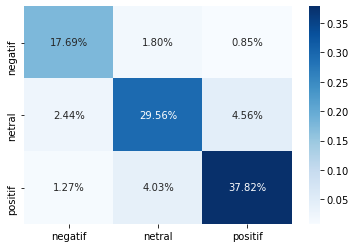

In [115]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])

In [106]:
model_2.save("Model2_Lr.h5")